In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [17]:
def ccf(ml_utility, max_utility):
    """
    Collaborative Characteristic Function (human+ml utility as a function of ml utility)
    """
    if ml_utility<=0:
        return None
    else:
        return math.min(max_utlity, ml_utility*(max_utility/ml_utility))

def get_error(data_size, c=1.0):
    """
    calculates the error as function of the data size. uses hoeffdings bound
    """
    if data_size<=0:
        return None
    else:
        return c/math.sqrt(data_size)

def get_angle(error, EPS=0.0000005):
    """
    Function that converts an approximate error rate 
    on the current distribution to the angle in the latent utility space
    """
    angle = 0
    if error >1:
        return 0
    if error <0:
        return 90
    
    if error <= EPS: #perfect learning
        angle = 90
    elif error >=1: # usually we can assume that 1/sqrt(n) <= 1 
        angle = 0
    else:
        angle = (1-error)*90
        
    return angle

def calculate_intersection(alpha, current_utility):
    """
    calculates the level of utility if we would deploy with the current learning angle
    """
    alpha_rad = np.radians(alpha)

    #slope of the learning trajectory
    if alpha == 90:
        m = 0 
    else:
        m = -1 / np.tan(alpha_rad)

    #y = m * x + current_utility
    #diagonal: y = x
    #set equal: m * x + current_utility = x
    #=> (m - 1) * x = -current_utility
    if m != 1:
        x_intersection = -current_utility / (m - 1)
        y_intersection = x_intersection  #y = x
        return x_intersection, y_intersection
    else:
        return None  #no intersection

max_utlity = 1.0
params = {
    "max_utility": max_utlity,
    "start_utility": 0.1,
    "data_collection_size": 100000,
    "time_preference":0.1
}

In [ ]:
class ContinuousEnvironment:
    def __init__(self, params):
        self.current_utility = params.start
        self.next_utility = self.current_utility
        self.time_preference = params.time_preference
        self.current_datasize = 0
        self.data_collection_size = params.data_collection_size
        self.accumulated_utility = []
        self.current_error = 1
        self.max_utlity = params.max_utility
        
    def collect_data(self):
        self.current_datasize = self.current_datasize+self.data_collection_size
        return self.current_datasize

    def step(self, action):
        """
        collect data to improve the next model's performance or deploy with the current learning trajectory 
        """
        if action == "collect":
            self.accumulated_utility = self.accumulated_utility.append(self.current_utility)
            self.current_datasize = collect_data()
            self.current_error = get_error(current_datasize)
            learning_trajectory = get_angle(current_error)
            next_ml_utility,_ = calculate_intersection(learning_trajectory,self.current_utility)
            self.next_utility = ccf(next_ml_utility,self.max_utility)
        elif action == "deploy":
            self.accumulated_utility = self.accumulated_utility.append(self.current_utility)
            self.current_datasize = 0
            self.current_utility = self.next_utility
            self.current_error = 1
        else:
            print(f"Action ´´{action}´´ not found")
            
    def render(self):
        
        plt.show()

/tmp/ipykernel_2116455/1248791063.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  m = -1 / np.tan(alpha_rad)  # Steigung basierend auf dem Winkel
/tmp/ipykernel_2116455/1248791063.py:60: RuntimeWarning: divide by zero encountered in scalar divide
  m = -1 / np.tan(np.radians(alpha))
/tmp/ipykernel_2116455/1248791063.py:62: RuntimeWarning: invalid value encountered in multiply
  y_new_line = m * x_new_line + x_start


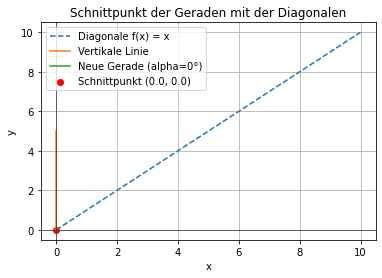

In [37]:
import numpy as np
import matplotlib.pyplot as plt



# Beispielwerte
alpha = 0  # Winkel in Grad
x_start = 5  # Startpunkt y-Koordinate

# Berechnung des Schnittpunkts
intersection = calculate_intersection(alpha, x_start)

# Plotten
fig, ax = plt.subplots()

# Diagonale f(x) = x
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals
ax.plot(x_vals, y_vals, label="Diagonale f(x) = x", linestyle="--")

# Vertikale Linie (erste Gerade)
ax.plot([0, 0], [0, x_start], label="Vertikale Linie")

# Neue Gerade
if alpha == 90:
    if intersection:
        x_new_line = np.linspace(0, intersection[0], 100)
        y_new_line = np.full_like(x_new_line, x_start)
        ax.plot(x_new_line, y_new_line, label=f"Neue Gerade (alpha={alpha}°)")
elif intersection:
    m = -1 / np.tan(np.radians(alpha))
    x_new_line = np.linspace(0, intersection[0], 100)
    y_new_line = m * x_new_line + x_start
    ax.plot(x_new_line, y_new_line, label=f"Neue Gerade (alpha={alpha}°)")

    # Schnittpunkt markieren
    ax.scatter(*intersection, color="red", label=f"Schnittpunkt {intersection}")

# Labels und Legende
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.legend()
ax.set_title("Schnittpunkt der Geraden mit der Diagonalen")

plt.grid()
plt.show()
